# TS8: Filtrado Digital Lineal de ECG

**Materia:** Análisis y Procesamiento de Señales  
**Carrera:** Ingeniería Electrónica – UNSAM  
**Docente:** Mariano Llamedo Soria, Francisco Hernan Ledesma y David Ezequiel Benoit  
**Integrantes:** Naudeau Nahiara y Gil María Serena  
**Fecha:** 16/11/2025  

---

## Objetivo

El objetivo de esta tarea es diseñar y aplicar filtros digitales lineales para mejorar la calidad de un registro de ECG real.  
Se busca:

- eliminar el movimiento de la línea de base (baja frecuencia),  
- reducir el ruido muscular y los artefactos de electrodos (alta frecuencia),  
- y preservar la morfología de los latidos cardíacos.

Para ello se diseñarán filtros FIR e IIR y se comparará su desempeño, verificando que la señal filtrada quede más limpia, suave y con una línea de base estable.

---

## Introducción

El electrocardiograma (ECG) es una señal que registra la actividad eléctrica del corazón y permite identificar la presencia de latidos normales o patológicos.  
Sin embargo, en registros reales —especialmente durante una prueba de esfuerzo— la señal suele estar afectada por distintos tipos de ruido:

- **Movimiento de electrodos:** cambios bruscos en el contacto piel–electrodo, que generan picos y artefactos de alta amplitud.
- **Ruido muscular (EMG):** componentes de alta frecuencia originadas por la actividad de los músculos cercanos.
- **Movimiento de la línea de base:** variaciones lentas producidas por la respiración u otros desplazamientos del cuerpo.

Estas interferencias pueden dificultar la correcta lectura de la señal y alterar la forma del complejo QRS, las ondas P y T, o el nivel de línea de base.  
Por este motivo se emplea **filtrado digital lineal**, que permite atenuar selectivamente las frecuencias indeseables mientras se preserva la información útil del ECG.

En esta tarea se trabajará con el archivo `ecg.mat`, junto con latidos promedio (normal y ventricular) que servirán como referencia para evaluar la calidad del filtrado.  
A partir de estas señales, se diseñarán filtros FIR e IIR basados en una plantilla de diseño ajustada a la banda de frecuencias característica del ECG, y se analizará su desempeño en regiones con y sin ruido.

----

## EJERCICIOS

---

### (a) Plantilla de diseño del filtro

Para definir la plantilla de diseño se toma como referencia el ancho de banda del ECG estimado en la TS5 y las morfologías promedio provistas.  
El objetivo es conservar la banda útil del ECG (donde aparecen las ondas P, QRS y T) y eliminar:

- el movimiento de la línea de base (muy baja frecuencia),  
- el ruido muscular y artefactos (alta frecuencia).

Con esto se establecen las bandas de paso y rechazo necesarias para que la señal filtrada mantenga trazos suaves y un nivel isoeléctrico estable.



ACA VA EL CODIGO

#### Análisis de resultados – Ítem (a)

---

### (b) Procedimiento para obtener los valores de la plantilla

Los valores de la plantilla se definieron a partir de las características espectrales del ECG
analizadas previamente en la TS5 y de las morfologías promedio provistas. El procedimiento
fue el siguiente:

1. **Identificar la banda útil del ECG** observando las ondas P, QRS y T.  
   Esto permitió ubicar el rango donde se concentra la energía principal de la señal.

2. **Determinar las fuentes de ruido** en el registro real:  
   - movimiento de la línea de base (muy baja frecuencia),  
   - ruido muscular y artefactos de electrodos (alta frecuencia).

3. **Elegir las frecuencias de corte** de manera que:  
   - la banda de paso conserve la forma del latido promedio,  
   - las bandas de rechazo atenúen las componentes indeseadas.

Con estos criterios se establecieron los valores finales de las bandas de paso y rechazo que
usan los filtros diseñados en los puntos siguientes.

---

### (c) Diseño de filtros FIR e IIR

En este punto se diseñan distintos filtros digitales que cumplan con la plantilla definida en los ítems anteriores.  
Se requieren **al menos dos filtros FIR** y **dos filtros IIR**, utilizando los métodos propuestos en la consigna:

- FIR: diseño por ventanas, cuadrados mínimos o Parks–McClellan.  
- IIR: aproximaciones de Butterworth (máxima planicidad), Chebyshev o Cauer.

El objetivo es obtener diferentes realizaciones de filtro y verificar que todas ellas cumplan
con la respuesta en frecuencia especificada en la plantilla.


#### Analisis de Resultados - ítem (b)

---

### (d) Evaluación del rendimiento de los filtros

En este punto se analiza cómo se comportan los filtros diseñados.  
Para ello se comparan las señales filtradas en regiones donde existe interferencia y en regiones donde la señal está limpia, verificando dos puntos:

1. Que el filtro suprima correctamente los ruidos presentes (movimiento, ruido muscular, deriva de línea de base).
2. Que no distorsione el ECG en zonas donde no hay ruido.

Se utilizan regiones de interés definidas en la consigna para hacer las comparaciones visuales.


Plantilla (Hz): ws1, wp1, wp2, ws2 = 0.1 0.8 35 40


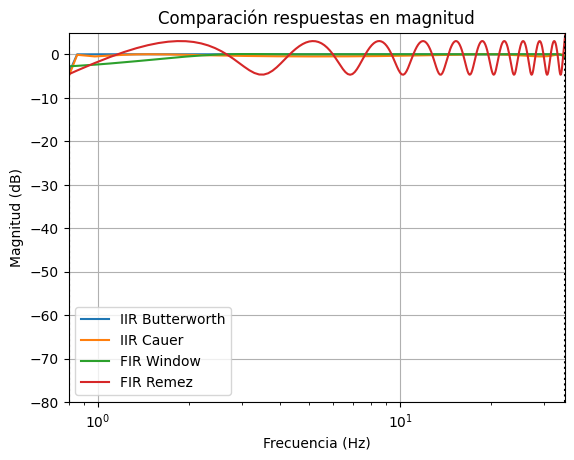

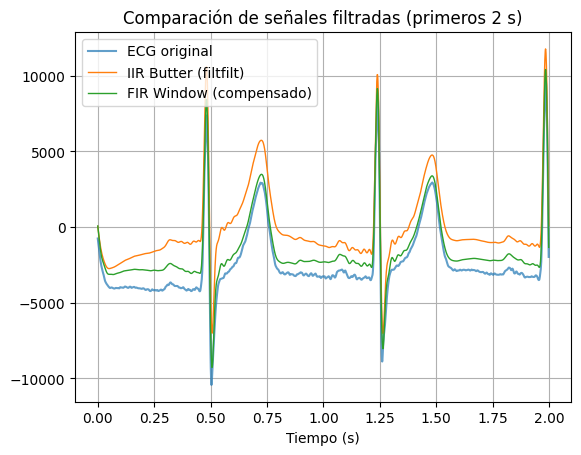

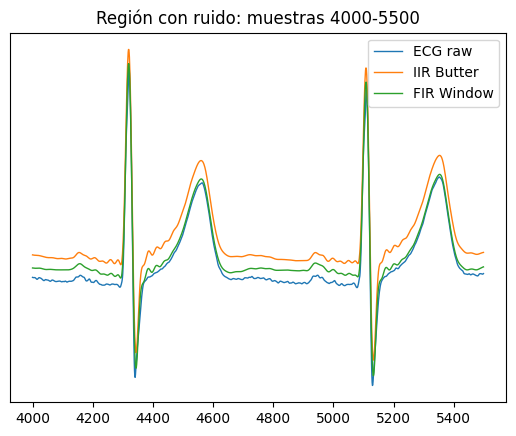

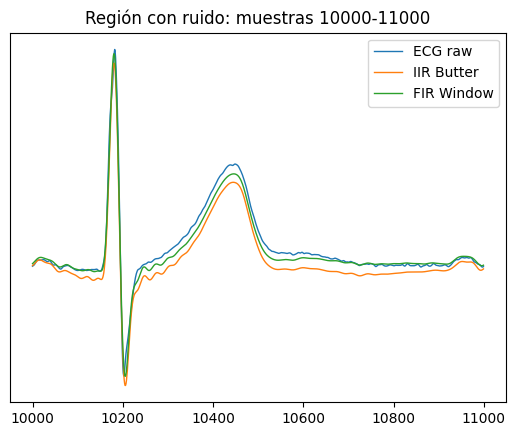

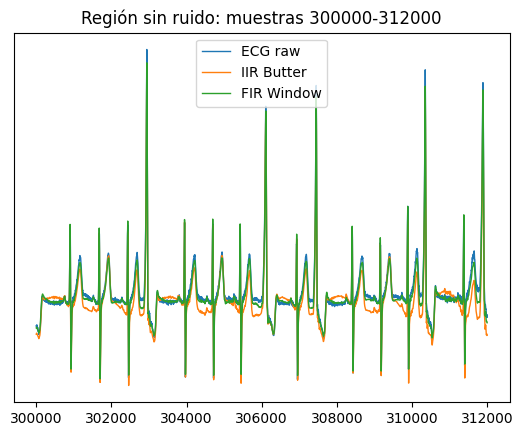

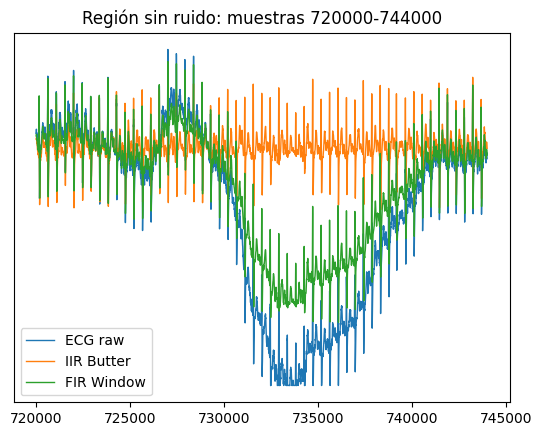

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io as sio

#----------Parametros y plantilla----------# punto a
fs = 1000
nyq_frec = fs / 2
ripple = 1       #(pasabanda)
atenuacion = 40   #(stopband)

#valores de la plantilla (decididos segUn TS59
ws1 = 0.1   # Hz  (stop baja)
wp1 = 0.8   # Hz  (pass baja)
wp2 = 35  # Hz  (pass alta)
ws2 = 40  # Hz  (stop alta)


frecs = np.array([0.0, ws1, wp1, wp2, ws2, nyq_frec]) / nyq_frec
gains_db = np.array([-atenuacion, -atenuacion, -ripple, -ripple, -atenuacion, -atenuacion])
gains = 10**(gains_db / 20)

print("Plantilla (Hz): ws1, wp1, wp2, ws2 =", ws1, wp1, wp2, ws2)

#----------Diseño de 2 filtros IIR (Butterworth y cauer)----------#

gpass = ripple/2  #divido por 2 porque voy a usar
gstop = atenuacion/2

#especifico wp y ws 
wp = (wp1, wp2)
ws = (ws1, ws2)

sos_butter = signal.iirdesign(wp=wp, ws=ws, gpass=gpass, gstop=gstop, ftype='butter', output='sos', fs=fs)
sos_cauer  = signal.iirdesign(wp=wp, ws=ws, gpass=gpass, gstop=gstop, ftype='cauer', output='sos', fs=fs)



#----------Diseño de 2 filtros FIR (ventana (firwin2) y Parks-McClellan (remez))----------#

#frecuencias para firwin2 en Hz 
freqs_fir = np.array([0.0, ws1, wp1, wp2, ws2, fs/2])

# respuesta deseada: 0 en stopbands y 1 en passband
desired_fir = np.array([0, 0, 1, 1, 0, 0])

#Cantidad de coeficientes
numtaps_win = 801   #impar para retardo entero (retardo = (numtaps-1)//2)
fir_win = signal.firwin2(numtaps=numtaps_win, freq=freqs_fir, gain=desired_fir, fs=fs, window='hann')

#Parks-McClellan (remez)
bands = [0, ws1, wp1, wp2, ws2, fs/2]
desired_remez = [0, 1, 0]
#weights
weights = [10, 1, 10]
numtaps_remez = 601
fir_remez = signal.remez(numtaps_remez, bands, desired_remez, weight=weights, fs=fs)

# ----------Respuestas en frecuencia----------#
w_iir, h_butter = signal.sosfreqz(sos_butter, worN=4096, fs=fs)
_, h_cauer = signal.sosfreqz(sos_cauer, worN=4096, fs=fs)
w_fir_win, h_fir_win = signal.freqz(fir_win, worN=4096, fs=fs)
w_fir_remez, h_fir_remez = signal.freqz(fir_remez, worN=4096, fs=fs)


plt.figure(1)
plt.semilogx(w_iir, 20*np.log10(np.abs(h_butter)+1e-12), label='IIR Butterworth')
plt.semilogx(w_iir, 20*np.log10(np.abs(h_cauer)+1e-12), label='IIR Cauer')
plt.semilogx(w_fir_win, 20*np.log10(np.abs(h_fir_win)+1e-12), label='FIR Window')
plt.semilogx(w_fir_remez, 20*np.log10(np.abs(h_fir_remez)+1e-12), label='FIR Remez')

#dibujo de la plantilla (zonas)
plt.axvspan(0, ws1, color='lightgray', alpha=0.25)
plt.axvspan(ws2, fs/2, color='lightgray', alpha=0.25)
plt.axvline(wp1, color='k', linestyle=':')
plt.axvline(wp2, color='k', linestyle=':')
plt.xlim(wp1, wp2)
plt.ylim([-80, 5])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.title('Comparación respuestas en magnitud')
plt.legend()
plt.grid(True)
plt.show()



# ----------Cargo mi ecg y aplico los filtros----------#
mat_struct = sio.loadmat('./ECG_TP4.mat')
ecg_one_lead = mat_struct['ecg_lead'].flatten()
N = len(ecg_one_lead)


#Aplico IIR con filtfilt
ecg_iir_butter = signal.sosfiltfilt(sos_butter, ecg_one_lead)
ecg_iir_cauer  = signal.sosfiltfilt(sos_cauer, ecg_one_lead)


# Aplico FIR y compenso retardo para mostrar en plots
ecg_fir_win = signal.lfilter(fir_win, 1, ecg_one_lead)
delay_win = (len(fir_win)-1)//2
ecg_fir_remez = signal.lfilter(fir_remez, 1, ecg_one_lead)
delay_remez = (len(fir_remez)-1)//2


# Para poderlo ver en el gráfico, tuve que correr la señal filtrada por el retardo
ecg_fir_win_corr = np.roll(ecg_fir_win, -delay_win)
ecg_fir_remez_corr = np.roll(ecg_fir_remez, -delay_remez)


# ----------Grafico----------#
plt.figure(2)
t = np.arange(0, 2000) / fs  # primeras 2 segundos (2000 muestras)
plt.plot(t, ecg_one_lead[:2000], label='ECG original', alpha=0.7)
plt.plot(t, ecg_iir_butter[:2000], label='IIR Butter (filtfilt)', linewidth=1)
plt.plot(t, ecg_fir_win_corr[:2000], label='FIR Window (compensado)', linewidth=1)
plt.legend()
plt.xlabel('Tiempo (s)')
plt.title('Comparación de señales filtradas (primeros 2 s)')
plt.grid()
plt.show()

# ----------evaluación en regiones (con y sin ruido)----------#
cant_muestras = N
regs_ruido = (
    (4000, 5500),
    (10000, 11000),
)
for ii in regs_ruido:
    a = max(0, int(ii[0]))
    b = min(cant_muestras, int(ii[1]))
    rng = np.arange(a, b)
    plt.figure(3)
    plt.plot(rng, ecg_one_lead[rng], label='ECG raw', linewidth=1)
    plt.plot(rng, ecg_iir_butter[rng], label='IIR Butter', linewidth=1)
    plt.plot(rng, ecg_fir_win_corr[rng], label='FIR Window', linewidth=1)
    plt.title(f'Región con ruido: muestras {a}-{b}')
    plt.legend()
    plt.gca().set_yticks(())
    plt.show()

regs_sin_ruido = (
    (int(5*60*fs), int(5.2*60*fs)),
    (int(12*60*fs), int(12.4*60*fs)),
)
for ii in regs_sin_ruido:
    a = max(0, int(ii[0]))
    b = min(cant_muestras, int(ii[1]))
    rng = np.arange(a, b)
    plt.figure(4)
    plt.plot(rng, ecg_one_lead[rng], label='ECG raw', linewidth=1)
    plt.plot(rng, ecg_iir_butter[rng], label='IIR Butter', linewidth=1)
    plt.plot(rng, ecg_fir_win_corr[rng], label='FIR Window', linewidth=1)
    plt.title(f'Región sin ruido: muestras {a}-{b}')
    plt.legend()
    plt.gca().set_yticks(())
    plt.show()